In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("tab10")
from scipy import stats
from sklearn.model_selection import train_test_split
import os
from langdetect import detect
seed = 1349
import unicodedata
import re
import nltk
from bs4 import BeautifulSoup
import requests
from nltk.corpus import stopwords
import wrangle_g as wr
import re

In [2]:
df = wr.prepare_mvp()
df

,repo,language,readme_contents
0,ujjwalkarn/DataScienceR,R,# R Data Science Tutorials\n- This repo contai...
1,IndrajeetPatil/ggstatsplot,R,---\noutput: github_document\n---\n\n <!-- RE...
2,easystats/easystats,R,"---\noutput: github_document\n---\n\n```{r, wa..."
3,seandavi/sars2pack,R,---\noutput: \n - rmarkdown::github_document\...
4,markvanderloo/lumberjack,R,## Track changes in data\n[![Build Status](htt...
...,...,...,...
350,rahulbordoloi/Machine-Learning,Python,# Machine-Learning\nContains my Glossary for M...
351,Oslandia/QDeeplandia,Python,QGIS plugin dedicated to 2D semantic segmentat...
352,arjunbhasin2013/BaselinePredictionMLFramework,Python,# Baseline Prediction Machine Learning Framewo...
353,PonderaLab/datascience4economists,Python,"# Datascience4economists\n\nFirst of all, welc..."


In [3]:
train, validate, test = wr.final_wrangle(df)

## Explore

In [4]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
r_df = clean(' '.join(train[train.language=='R']['stopped']))

In [6]:
python_df = clean(' '.join(train[train.language=='Python']['stopped']))

In [7]:
all_df = clean(' '.join(train['stopped']))

In [8]:
r_freq = pd.Series(r_df).value_counts()
python_freq = pd.Series(python_df).value_counts()
all_freq = pd.Series(all_df).value_counts()

In [9]:
len(r_freq) + len(python_freq) == len(all_freq)


False

In [10]:
len(r_freq)

4320

In [11]:
len(python_freq)

7381

In [12]:
len(all_freq)

10196

In [13]:
all_freq.head()

data       851
use        589
model      326
file       262
install    227
Name: count, dtype: int64

In [14]:
r_freq.head()


data        326
use         193
model       152
package     132
function     87
Name: count, dtype: int64

In [15]:
python_freq.head()

data       525
use        396
install    207
file       199
run        182
Name: count, dtype: int64

In [16]:
word_counts = pd.concat([r_freq, python_freq,all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['r', 'python' ,'all']
word_counts.head()

,r,python,all
data,326,525,851
use,193,396,589
model,152,174,326
package,132,45,177
function,87,52,139


<AxesSubplot:>

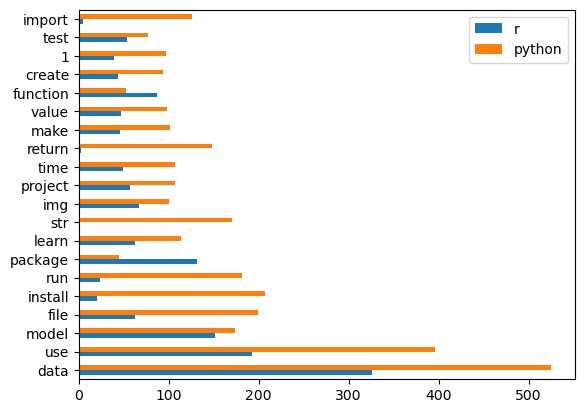

In [17]:
word_counts.sort_values('all', ascending=False
                       )[['r','python']].head(20).plot.barh()

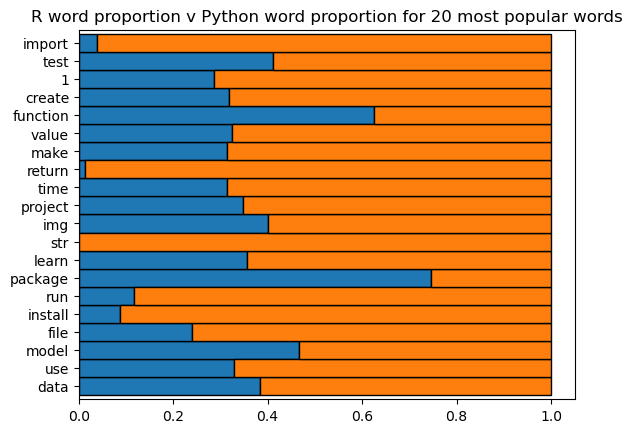

In [18]:
word_counts.sort_values('all', ascending=False
                       ).head(20).apply(
    lambda row: row/row['all'], axis=1
)[['r','python']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1).set(title='R word proportion v Python word proportion for 20 most popular words');
                                                         

## N-Grams

<AxesSubplot:>

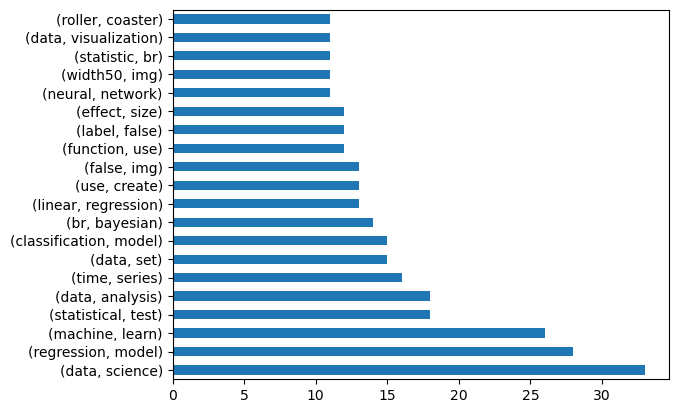

In [19]:
pd.Series(nltk.bigrams(r_df)).value_counts().head(20).plot.barh()


<AxesSubplot:>

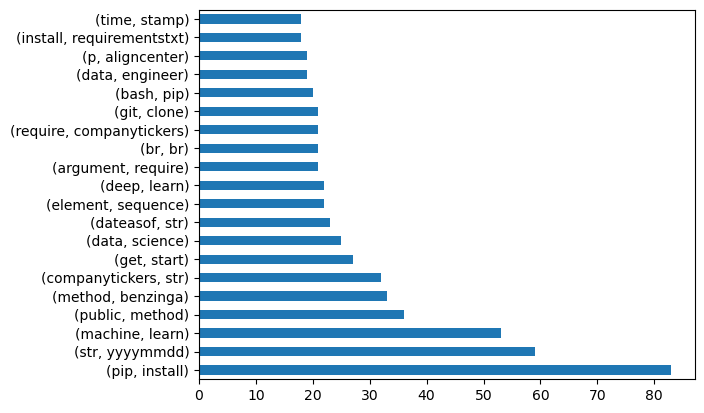

In [20]:
pd.Series(nltk.bigrams(python_df)).value_counts().head(20).plot.barh()


<AxesSubplot:>

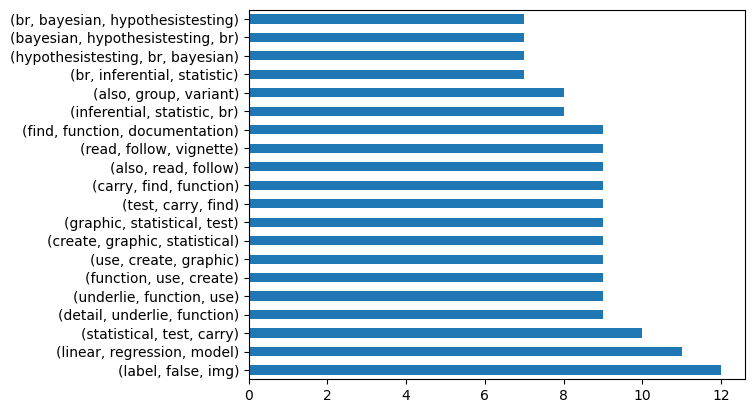

In [21]:
pd.Series(nltk.ngrams(r_df, 3)
         ).value_counts().head(20).plot.barh()

<AxesSubplot:>

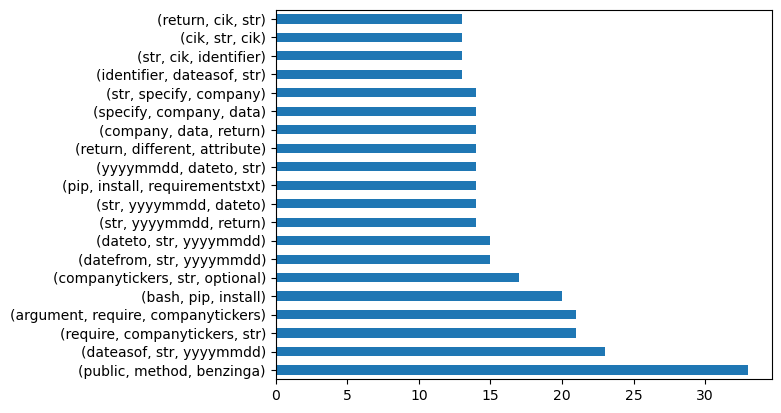

In [22]:
pd.Series(nltk.ngrams(python_df, 3)
         ).value_counts().head(20).plot.barh()

In [23]:
word_counts

,r,python,all
data,326,525,851
use,193,396,589
model,152,174,326
package,132,45,177
function,87,52,139
...,...,...,...
pyresearchfps,0,1,1
fpsreader,0,1,1
srchttpsuserimagesgithubusercontentcom341258512263904650c400a81b3f74384b057d1b5a9531f5bmovvideo,0,1,1
printfaces0,0,1,1


In [34]:
word_counts.reset_index(inplace=True)

# Rename the column
word_counts.rename(columns={'index': 'words'}, inplace=True)

# Print the DataFrame
word_counts

,words,r,python,all
0,data,326,525,851
1,use,193,396,589
2,model,152,174,326
3,package,132,45,177
4,function,87,52,139
...,...,...,...,...
10191,pyresearchfps,0,1,1
10192,fpsreader,0,1,1
10193,srchttpsuserimagesgithubusercontentcom34125851...,0,1,1
10194,printfaces0,0,1,1


In [58]:
r_only_words = word_counts[(word_counts['r'] > 0) & (word_counts['python'] == 0)]['words']

len(r_only_words.tolist())

2815

In [59]:
python_only_words = word_counts[(word_counts['python'] > 0) & (word_counts['r'] == 0)]['words']

len(python_only_words.tolist())

5876